<h2 style="text-align: center;"><b>Библиотека <a href="http://pandas.pydata.org/">pandas</a>: Контрольная работа №1</b></h2>

In [ ]:
#!pip install pandas

In [ ]:
import pandas as pd
import numpy as np

### Размещение DF (датафрейма) в формате csv: https://drive.google.com/open?id=1il9RDoxwrgUjoOqd9yvdV760_M1AvziI

#### считать файл по ссылке

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?id=1il9RDoxwrgUjoOqd9yvdV760_M1AvziI')

In [ ]:
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Посмотрим, что же такое переменная `df`:

### выяснить тип объекта

In [ ]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


---

#### Вопрос

О чём данные?

---

#### Основное задание:

*Примечание:* не бойтесь гуглить и заглядывать в "Полезные ссылки" для того, чтобы выполнить какие-то задания. Возможно, в курсе не было какого-то нужного метода, но он находится в поисковике за 2 минуты.

**0).** Сколько всего возрастных категорий?  

In [ ]:
unique_ages = len(df['Age'].unique())
print(f"Количество возрастных категорий: {unique_ages}")

Количество возрастных категорий: 7


**1).** Сколько строк с мужчинами из категории города A? (речь не об уникальных ID мужчин, а о количестве строк)  

In [ ]:
num_males_in_city_a = len(df.query("Gender == 'M' and City_Category == 'A'"))
print(f"Количество строк с мужчинами из города А: {num_males_in_city_a}")

Количество строк с мужчинами из города А: 109831


**2).** Сколько женщин от 46 до 50, потративших (столбец Purchase) больше 20000 (условных единиц, в данном случае)?   (речь не об уникальных ID, а о количестве строк)  

In [ ]:
num_female = len(df[(df["Gender"] =="F")&(df["Age"] =="46-50")&(df["Purchase"]>20000)])
print(num_female)

270


**3).** Сколько NaN'ов в столбце Product_Category_3?  

In [ ]:
num_nan = df["Product_Category_3"].isna().sum()
print(num_nan)

373299


**4).** Какую долю (вещественное число от 0 до 1, округлить до 4-го знака) от всех покупателей составляют ВМЕСТЕ мужчины от 26 до 35 лет и женщины старше 36 лет (то есть нужно учесть несколько возрастных категорий)? (речь не об уникальных ID, а о количестве таких строк)  

In [ ]:
total_num = len(df)
num_male_26to35 = len(df[(df["Gender"] == "M")& (df["Age"] == "26-35")])
num_female_over36 = len(df[(df["Gender"] == "F")& (df["Age"].isin(["36-45","46-50","51-55","55+"]))])
num_target_customers = num_male_26to35 + num_female_over36
fraction_target_customers = num_target_customers/ total_num
print(round(fraction_target_customers,4))

0.4077


**5).** Построить сравнительную диаграмму зависимости суммы потраченных средств по возрастным категориям для мужчин и женщин

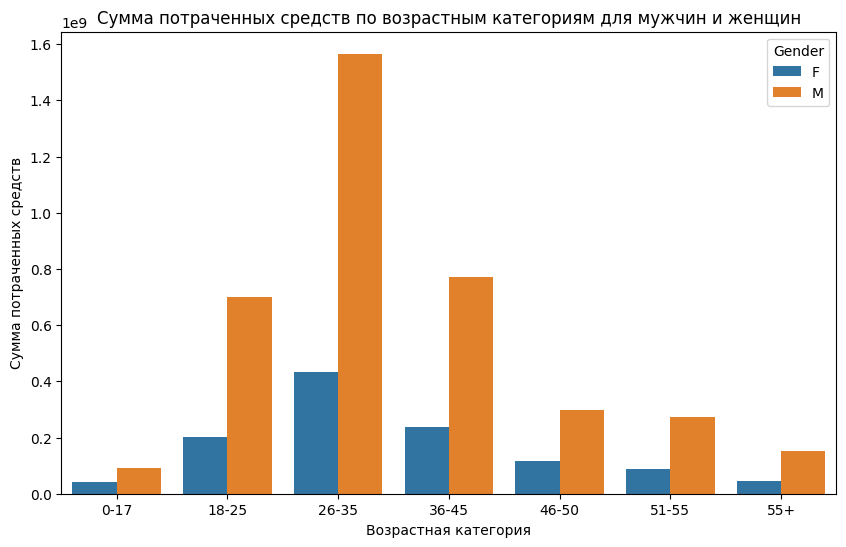

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# создание DataFrame с суммой потраченных средств по возрастным категориям для мужчин и женщин
df_gender_age_purchase = df.groupby(['Gender', 'Age'])['Purchase'].sum().reset_index()

# создание сравнительной диаграммы
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x='Age', y='Purchase', hue='Gender', data=df_gender_age_purchase)
ax.set_title('Сумма потраченных средств по возрастным категориям для мужчин и женщин')
ax.set_xlabel('Возрастная категория')
ax.set_ylabel('Сумма потраченных средств')
plt.show()

**6).** Найдите самую оптимальную сумму для каждого пола

In [ ]:
optimal_purchase = df.groupby("Gender")["Purchase"].max()
print(optimal_purchase)

Gender
F    23959
M    23961
Name: Purchase, dtype: int64


---

Больше про pandas можно найти по этом полезным ссылкам:

* Официальные туториалы: http://pandas.pydata.org/pandas-docs/stable/tutorials.html

* Статья на Хабре от [OpenDataScience сообщества](http://ods.ai/)**:** https://habr.com/company/ods/blog/322626/

* Подробный гайд: https://media.readthedocs.org/pdf/pandasguide/latest/pandasguide.pdf

* видео вебинара с GB "Первичный анализ данных с Pandas (Python)" https://gb.ru/events/3717

Главное в работе с новыми библиотеками -- не бояться тыкать в разные функции, смотреть типы возвращаемых объектов и активно пользоваться Яндексом, а ещё лучше понимать всё из docstring'а (`Shift+Tab` при нахождении курсора внутри скобок функции).